In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from joblib import dump, load
from sklearn.feature_selection import mutual_info_classif

## Load dataset

In [2]:
data = pd.read_csv("../data/gtzan/features/features.csv")
data.head()

,spectral_centroid_mean,spectral_centroid_std,spectral_rolloff_mean,spectral_rolloff_std,spectral_flux_mean,spectral_flux_std,spectral_flatness_mean,spectral_flatness_std,spectral_crest_mean,spectral_crest_std,...,mfcc50,mfcc51,mfcc52,spectral_contrast1,spectral_contrast2,spectral_contrast3,spectral_contrast4,spectral_contrast5,spectral_contrast6,spectral_contrast7
0,4236.474714,982.606885,8793.280162,1323.747624,0.000076,0.000026,0.605682,0.099881,0.027226,0.017332,...,-1.607495,1.515278,2.070807,18.560327,14.327634,17.295292,18.093087,17.996459,16.877070,17.724842
1,2812.489293,349.267902,5400.967341,759.916203,0.000069,0.000013,0.270527,0.042840,0.019189,0.006779,...,-0.882777,-0.973334,-6.110501,19.362248,14.040931,16.694309,16.230232,16.095430,16.747360,44.551932
2,2450.523392,379.859735,5183.285324,793.619668,0.000064,0.000019,0.246184,0.040667,0.024748,0.009379,...,-3.675455,6.209002,3.841052,23.645757,13.455069,17.711881,17.236325,18.260737,17.183554,42.800888
3,2227.556580,381.427900,4783.371076,864.112446,0.000047,0.000016,0.199687,0.047106,0.037910,0.015577,...,0.928920,1.216654,-4.513656,20.567922,14.943247,18.781786,18.599186,18.818521,18.046930,41.533920
4,1712.995682,323.886378,3287.380122,671.487712,0.000051,0.000012,0.206120,0.051080,0.041573,0.016614,...,-0.907547,-6.269558,-2.652799,27.290526,16.129215,17.299815,18.574594,18.375764,18.994693,20.393723


## Separate features and labels

In [3]:
x,y=data.loc[:,(data.columns!="label")],data["label"].values
x.describe()

,spectral_centroid_mean,spectral_centroid_std,spectral_rolloff_mean,spectral_rolloff_std,spectral_flux_mean,spectral_flux_std,spectral_flatness_mean,spectral_flatness_std,spectral_crest_mean,spectral_crest_std,...,mfcc50,mfcc51,mfcc52,spectral_contrast1,spectral_contrast2,spectral_contrast3,spectral_contrast4,spectral_contrast5,spectral_contrast6,spectral_contrast7
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2296.882621,586.688185,4784.647351,1165.377714,0.000053,0.000023,0.281621,0.077131,0.052802,0.026762,...,-2.961272,-1.287171,-0.128813,21.622877,16.304677,19.626889,19.326932,19.302102,18.788109,28.689134
std,722.335189,242.109733,1593.144938,459.044697,0.000020,0.000008,0.149121,0.038188,0.022872,0.013790,...,4.171299,4.862141,4.053424,4.007460,2.268336,2.777601,2.761451,2.556648,2.233744,11.293361
min,630.302812,120.513275,809.145107,191.907821,0.000010,0.000005,0.041616,0.010684,0.016650,0.005834,...,-21.545710,-30.284199,-10.309322,12.866975,10.641026,11.654762,13.945094,14.044483,14.606365,13.272827
25%,1756.405512,406.527914,3630.269715,817.806789,0.000040,0.000017,0.165929,0.046561,0.035138,0.016495,...,-5.359395,-4.018410,-2.842375,18.744988,14.687372,17.654559,17.447953,17.551469,17.152131,16.488043
50%,2302.790796,546.915943,4837.004085,1103.876207,0.000050,0.000021,0.239653,0.068310,0.048319,0.023505,...,-2.933870,-1.461173,-0.397219,20.865235,15.893058,19.132381,18.824427,18.789529,18.250999,31.746330
75%,2767.402603,731.543370,5717.632093,1454.475795,0.000065,0.000026,0.405905,0.105074,0.066207,0.034365,...,-0.560671,1.394128,2.246436,24.148579,17.633827,21.236681,20.750414,20.768784,19.947682,39.930024
max,4461.849487,1717.855352,8793.280162,3042.267729,0.000142,0.000060,0.629493,0.259798,0.141676,0.091879,...,19.069485,18.501060,17.306295,37.032863,24.976950,29.747542,30.072212,31.939762,27.956589,46.533713


## Models

The following probabilistic models will be applied in order to try and perfom music genre reccognition
- $k$ Nearest Neighbours ($k$NN)
- Naive Bayes (NB)
- Logistic Regression
- Support Vector Machines (SVM)
- Random Forest (RF)
- Multililayer Perceptron (MLP)

The perfomance of the above outlined models will be evaluated using $k$ fold cross validation. In our case we will use 10 fold cross validation. In which we split the dataset into $k$ subsets (called folds) then we perform training on the all the subsets but leave one subset for the evaluation of the trained model. In this method, we iterate $k$ times with a different subset reserved for testing purpose each time, and the perfomance of the model is recorded at each iteration in which the overall perfomance is the average of perfomance scores obtained over $k$ iterations.

### Feature normalization
#### Normalization parameters

In [4]:
def normalization_parameters(x):
    mu = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return mu, std

#### Normalize features

In [5]:
def normalize_features(x, mu, std):
    x = (x - mu) / (std + 1e-8)
    return x

In [6]:
mu, std = normalization_parameters(x)
x_norm = normalize_features(x, mu, std)

## Fitting  models

Below we fit the outlined probabilistic models to have a baseline of their perfomance and then the best one will be picked and used for feature selection abd further perfomance evaluation.

### $k$NN 
$k$ nearest neighbours classifier, the distance metric is the mahattan distance and distance weighting is used. To determine the parameter $k$ we perfom a parameter sweep in the following search space $\{3,5,7,9,....,15\}$.

In [101]:
k_space = [2*i+1 for i in range(1,8)]
peak_score = -1
std = -1
optimal_k = -1
for k in k_space:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm="brute",weights="distance",metric="manhattan")
    knn.fit(x_norm,y)
    scores = cross_validate(knn, x_norm, y, scoring='accuracy', cv=10,return_train_score=True)
    score = scores["test_score"].mean()
    
    if score>peak_score:
        peak_score = score
        std = scores["test_score"].std()
        optimal_k = k
        scores_recall = scores
        
print("10 fold cross validation results")
print(optimal_k,"nearest neighbours")
print("Fit time :",scores_recall["fit_time"].mean())
print("Accuracy: %0.2f (+/- %0.2f)" % (peak_score,std))

10 fold cross validation results
7 nearest neighbours
Fit time : 0.00126495361328125
Accuracy: 0.70 (+/- 0.03)


### Naive Bayes (NB)
Gaussian naive bayes with smoothing.

In [9]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_norm, y)
scores = cross_validate(naive_bayes, x_norm, y, scoring="accuracy", cv=10)
print("10 fold cross validation results")
print("Fitting time :",scores["fit_time"].mean())
print("Accuracy: %0.2f (+/- %0.2f)" % (scores["test_score"].mean(),scores["test_score"].std()))

10 fold cross validation results
Fitting time : 0.0023026227951049804
Accuracy: 0.59 (+/- 0.04)


### Logistic regression (LR)
Logistic regression which uses the one vs all strategy for multiclass classification. The optimizer is newton-cg with default tolerance of $10^{-4}$, default number of iterations which is $500$.

In [114]:
logistic_regression = LogisticRegression(random_state=1,solver="newton-cg",C=1.1,max_iter=500)
logistic_regression.fit(x_norm, y)
scores = cross_validate(logistic_regression, x_norm, y, scoring="accuracy",cv=10)
print("10 fold cross validation results")
print("Fitting time :",scores["fit_time"].mean())
print("Accuracy: %0.2f (+/- %0.2f)" % (scores["test_score"].mean(),scores["test_score"].std()))

10 fold cross validation results
Fitting time : 0.10152361392974854
Accuracy: 0.76 (+/- 0.04)


### Support Vector Machine (SVM)
Support vector machine with a radial basis function kernel. The regularization strength is set to $\frac{1}{C}$ with $C>0$. The optimal value for $C$ is found by a parameter sweep in the space $\{1,2,3,..,8\}$.

In [11]:
regularization_parameters=np.arange(1,9,1)
peak_score = -1
scores_recall = -1
for c in regularization_parameters:
    support_vector_machine = svm.SVC(kernel="rbf",break_ties=False,C=c)
    support_vector_machine.fit(x_norm, y)
    scores = cross_validate(support_vector_machine, x_norm, y, scoring="accuracy",cv=10)
    score = scores["test_score"].mean()
    
    if score>peak_score:
        peak_score=score
        std=scores["test_score"].std()
        scores_recall=scores
        optimal_c=c
        
print("10 fold cross validation results")
print("Optimal regularization C =" , optimal_c)
print("Fit time :",scores_recall["fit_time"].mean())
print("Test scores :",scores_recall["test_score"])
print("Accuracy: %0.2f (+/- %0.2f)" % (peak_score,std))

10 fold cross validation results
Optimal regularization C = 6
Fit time : 0.14881703853607178
Test scores : [0.74 0.79 0.75 0.81 0.77 0.83 0.73 0.73 0.84 0.83]
Accuracy: 0.78 (+/- 0.04)


### Random forest
Random forest in which we us the entropy function to measure the quality of a split. The maximum depth is $100$.

In [119]:
random_forest = RandomForestClassifier(max_depth=10,random_state=0,criterion="gini",n_estimators=100)
random_forest.fit(x_norm,y)
scores = cross_validate(random_forest, x_norm, y, scoring="accuracy",cv=10)
print("10 fold cross validation results")
print("Fit time :",scores["fit_time"].mean())
print("Accuracy: %0.2f (+/- %0.2f)" % (scores["test_score"].mean(),scores["test_score"].std()))

10 fold cross validation results
Fit time : 0.40020925998687745
Accuracy: 0.72 (+/- 0.04)


### Multilayer Perceptron
Multilayer perceptron in which the activation function for all neurons is the relu function. The network architecture is such that we have 2 hidden layers which the first consist of 52 neurons which is approximatley half the number of input neurons and the second consist of 10 neurons which is the number of classes. The newtwork learning rate is fixed at $0.02$ and uses the adam optimizer.

In [13]:
multilayer_perceptron = MLPClassifier(activation="relu",learning_rate="constant",learning_rate_init=0.02,random_state=1, max_iter=300,
                                      hidden_layer_sizes=(52,10),solver="adam")
multilayer_perceptron.fit(x_norm,y)
scores = cross_validate(multilayer_perceptron, x_norm, y, scoring="accuracy",cv=10)
print("10 fold cross validation results")
print("Fit time :",scores["fit_time"].mean())
print("Accuracy: %0.2f (+/- %0.2f)" % (scores["test_score"].mean(),scores["test_score"].std()))

10 fold cross validation results
Fit time : 0.18280422687530518
Accuracy: 0.74 (+/- 0.04)


## Dimensionality reduction

Dimensionally reduction is helpful in selecting and keeping features tha have strong discrinibating power in the dataset. Reducing the dimensionality reduces time taken to train and fit model and redundant patterns and noise is removed from the data.

###  Dimensionality Reduction by Mutual Information

Dimensionality reduction is perfomed using a mutual information based technique. In which we want to keep features that give maximum amount of information about our target variable (class label). 

In [14]:
features=np.array([feature for feature in x_norm.columns])
information_gain=mutual_info_classif(x_norm, y,n_neighbors=3)
idx=np.argsort(information_gain)[::-1]
information_gain=information_gain[idx]
features=features[idx]

We now continuosly add features with accordance to their mutual information gain until model perfomance starts to flatten out in order to get a cut off point.

Number of features kept: 54
Number of features: removed 51
Accuracy: 0.81 (+/- 0.04)


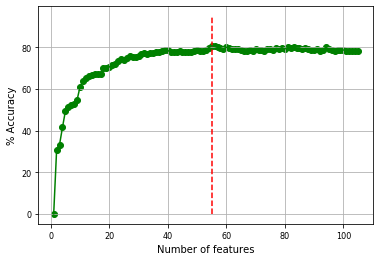

In [107]:
number_of_features=np.arange(1,len(features)+1)
accuracy=np.zeros(len(features))
std=np.zeros(len(features))

for i in range(1,len(features)):
    x_norm_pruned=x_norm[(features[:i])]
    support_vector_machine = svm.SVC(kernel="rbf",C=6)
    support_vector_machine.fit(x_norm_pruned, y)
    scores = cross_validate(support_vector_machine, x_norm_pruned, y, scoring="accuracy",cv=10)
    accuracy[i]=scores["test_score"].mean()
    std[i]=scores["test_score"].std()
    
index=np.argsort(accuracy)
print("Number of features kept:",index[-1])
print("Number of features: removed",len(idx)-index[-1])
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy[index[-1]],std[-1]))
plt.figure()
plt.grid(True)
# plt.rc('xtick',labelsize=8)
# plt.rc('ytick',labelsize=8)
plt.xlabel("Number of features")
plt.ylabel("% Accuracy")

plt.scatter(number_of_features,accuracy*100,c="green")
plt.plot(number_of_features,accuracy*100,c="green")
plt.vlines(x=55,ymin=0,ymax=95,linestyles="dashed",color="red")
plt.savefig("accuracy_graph.png")
plt.show()


### Best feature subset

In [16]:
idx=np.argsort(accuracy)[::-1]
optimal_features=(features[0:idx[0]])
for i in range(len(optimal_features)):
    print(optimal_features[i],",","mutual information :",information_gain[i])

spectral_contrast5 , mutual information : 0.5623211196258615
spectral_contrast4 , mutual information : 0.5084518220219452
spectral_contrast7 , mutual information : 0.4625039367802155
spectral_rolloff_mean , mutual information : 0.45895553365860353
spectral_flatness_mean , mutual information : 0.41448751457209765
spectral_centroid_mean , mutual information : 0.4028711606617521
spectral_contrast3 , mutual information : 0.40286893992648043
mfcc1 , mutual information : 0.38362029227418226
rms_mean , mutual information : 0.38310935641125266
rms_std , mutual information : 0.3782258048716032
spectral_skewness_mean , mutual information : 0.374895499279305
spectral_flatness_std , mutual information : 0.3690723906304201
spectral_centroid_std , mutual information : 0.3501221807448536
spectral_kurtosis_std , mutual information : 0.3356906851522492
spectral_kurtosis_mean , mutual information : 0.3353773359140044
spectral_contrast6 , mutual information : 0.3313731930628556
mfcc2 , mutual information

### Save models and pruned feature set

In [120]:
x_norm_pruned=x_norm[optimal_features].copy()
support_vector_machine = svm.SVC(kernel="rbf",C=6,probability=True)
support_vector_machine.fit(x_norm_pruned, y)
logistic_regression = LogisticRegression(random_state=1,solver="newton-cg",C=1.1,max_iter=500)
logistic_regression.fit(x_norm_pruned, y)
multilayer_perceptron = MLPClassifier(activation="relu",learning_rate="constant",learning_rate_init=0.02,random_state=1, max_iter=300,
                                      hidden_layer_sizes=(52,10),solver="adam")
multilayer_perceptron.fit(x_norm_pruned,y)
random_forest = RandomForestClassifier(max_depth=100,random_state=0,criterion="gini")
random_forest.fit(x_norm_pruned,y)
knn = KNeighborsClassifier(n_neighbors=k,algorithm="brute",weights="distance",metric="manhattan")
naive_bayes = GaussianNB()
naive_bayes.fit(x_norm_pruned, y)
knn.fit(x_norm_pruned,y)    
dump(support_vector_machine, '../models/svm.joblib')
dump(logistic_regression,'../models/lgr.joblib')
dump(multilayer_perceptron,'../models/mlp.joblib')
dump(random_forest,'../models/rf.joblib')
dump(knn,'../models/knn.joblib')
dump(naive_bayes,'../models/nb.joblib')
x_norm_pruned["label"]=y
x_norm_pruned.to_csv("../data/gtzan/features/features_pruned.csv",index=False)